In [7]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect("../data/checking-logs.sqlite")

In [8]:
query = """
    SELECT timestamp, uid
    FROM checker
    WHERE uid LIKE 'user_%'
      AND status = 'ready'
      AND labname = 'project1'
"""
df = pd.read_sql_query(query, conn)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date

In [12]:
# Count commits by day and user
commits_per_day = df.groupby(['date', 'uid']).size().reset_index(name='commits')

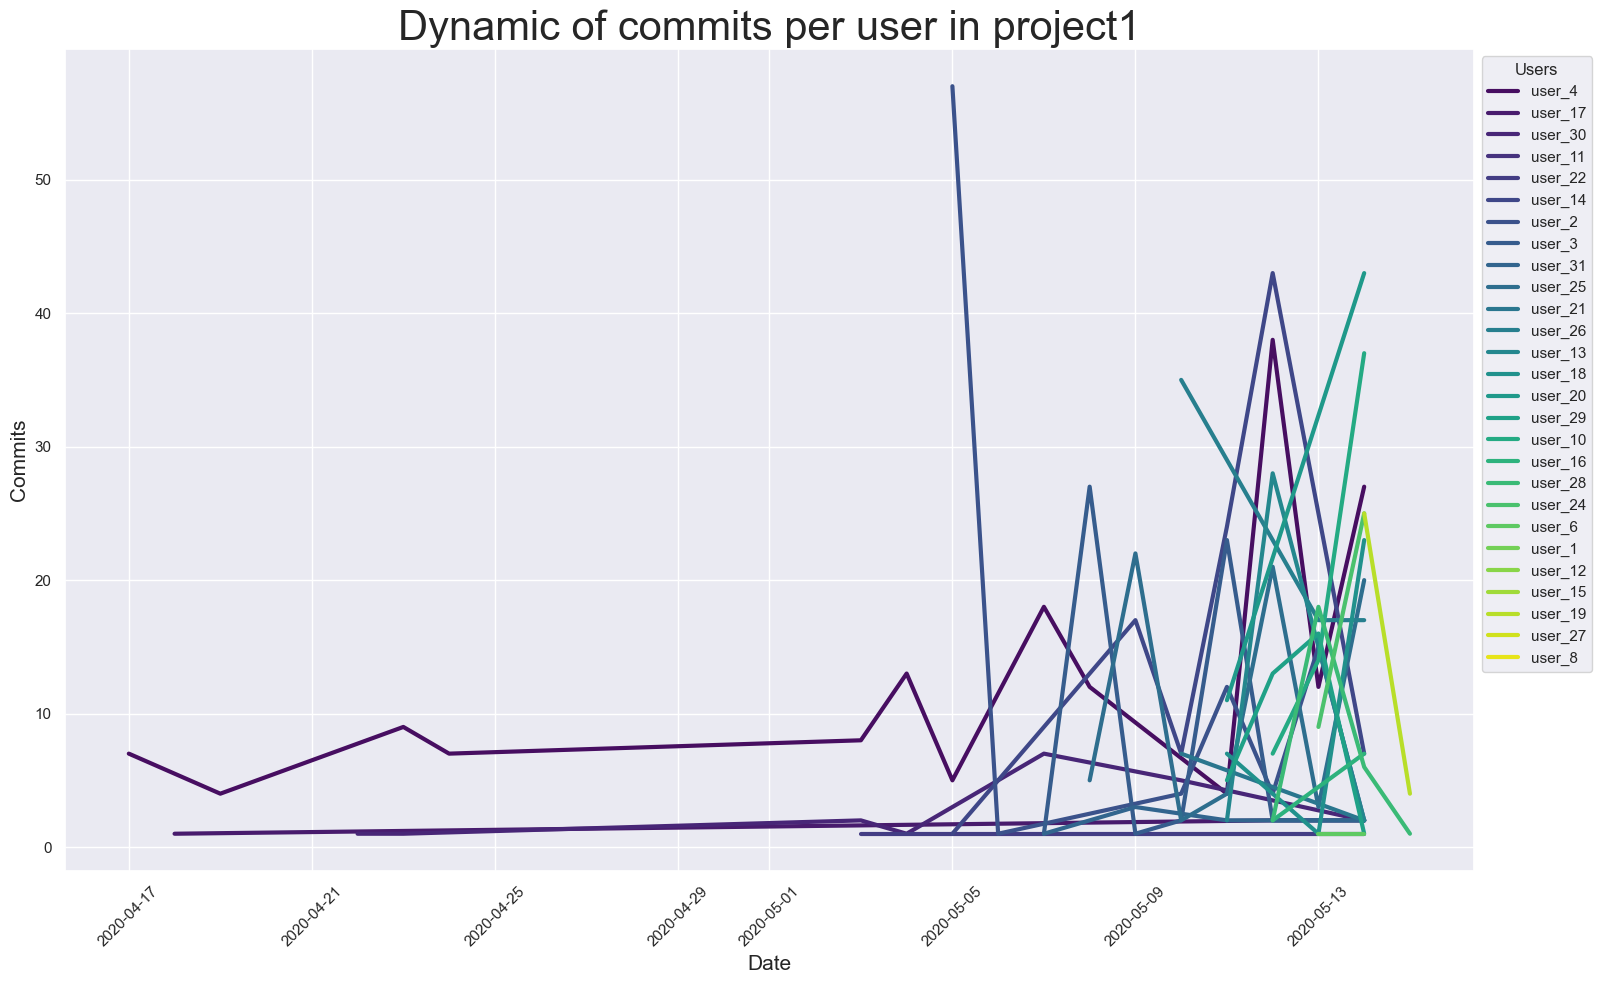

In [14]:
# Seaborn Style Setup
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10)) 

# Graph
lineplot = sns.lineplot(
    data=commits_per_day,
    x='date',
    y='commits',
    hue='uid',
    palette='viridis',
    linewidth=3,
    legend='full'
)

# Customize the design
plt.title('Dynamic of commits per user in project1', fontsize=30)
plt.xlabel('timestamp', fontsize=15)
plt.ylabel('Commits', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()

# Simplifying the legend
handles, labels = lineplot.get_legend_handles_labels()
plt.legend(
    title='Users',
    loc='upper left',
    bbox_to_anchor=(1, 1)
)
plt.show()

In [ ]:
conn.close()

### Вопросы:

1. **Какой пользователь был лидером по количеству коммитов почти все время?** 
Ответ: user_4

2. **Какой пользователь был лидером только короткий промежуток времени?** 
Ответ: user_3